In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import PIL
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense , Conv2D, MaxPooling2D ,Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import os

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

0


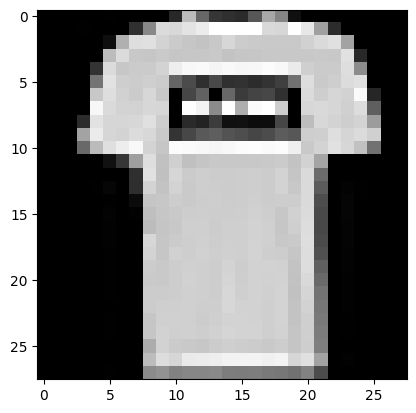

In [3]:
plt.imshow(x_train[1] , cmap = 'grey')
print(y_train[1])

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [4]:
# checking image size
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [6]:
print(x_train[0].max())

255


In [7]:
# normalise pixel size
x_train = x_train /255.0
x_test = x_test /255.0

In [8]:
print(x_test[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
# reshape images into single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
# creating val set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.16, random_state=42)


In [11]:
x_val.shape

(9600, 28, 28, 1)

In [12]:
x_val.max()

1.0

In [13]:
# now train the model based on architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64 , (3,3) ,strides=(1, 1), activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 697,952 (2.66 MB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 465,302 (1.77 MB)

In [14]:
model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True) , metrics = ['accuracy'])

In [15]:
log_dir = os.mkdir('logs')

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [17]:
early_stop = EarlyStopping(monitor = 'val_loss' , patience = 3 , restore_best_weights=True)

In [18]:
hist = model.fit(x_train , y_train , epochs = 20 , validation_data=(x_val , y_val) , callbacks=[tensorboard_callback , early_stop])

Epoch 1/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7503 - loss: 0.6732 - val_accuracy: 0.8687 - val_loss: 0.3569
Epoch 2/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8791 - loss: 0.3298 - val_accuracy: 0.8779 - val_loss: 0.3233
Epoch 3/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8960 - loss: 0.2810 - val_accuracy: 0.9031 - val_loss: 0.2693
Epoch 4/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9121 - loss: 0.2355 - val_accuracy: 0.9076 - val_loss: 0.2598
Epoch 5/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9221 - loss: 0.2093 - val_accuracy: 0.9110 - val_loss: 0.2479
Epoch 6/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9293 - loss: 0.1878 - val_accuracy: 0.8983 - val_loss: 0.2827
Epoch 7/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9363 - loss: 0.1679 - val_accuracy: 0.9081 - val_loss: 0.2554
Epoch 8/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9456 - loss: 0.144

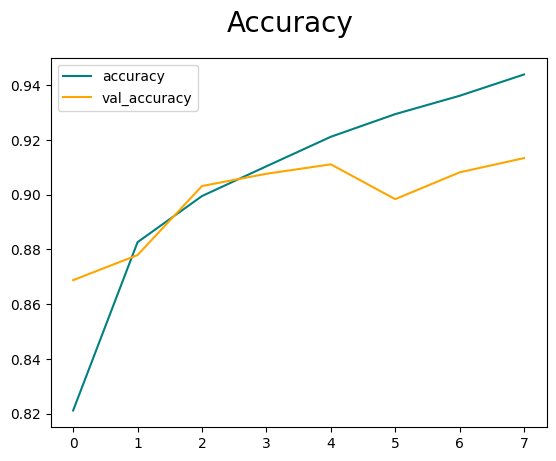

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , color = 'orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


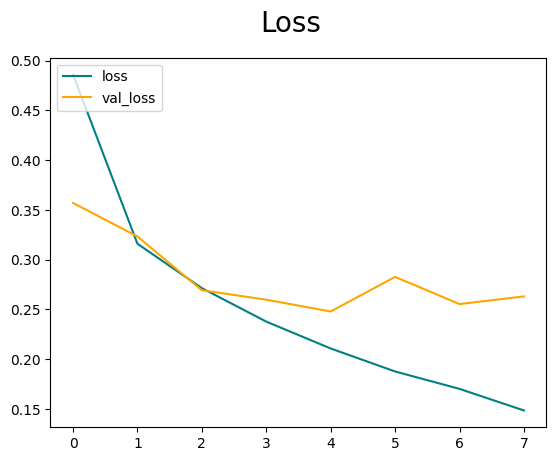

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'] , color = 'orange' , label = 'val_loss')
fig.suptitle('Loss' , fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


In [21]:
# evaluate model
test_loss , test_accuracy = model.evaluate(x_test , y_test , verbose = 2)
print("\n Test Accuracy" , test_accuracy)

313/313 - 1s - 5ms/step - accuracy: 0.9031 - loss: 0.2681

 Test Accuracy 0.9031000137329102


In [23]:
model.save('trained_fashion_detection.h5')